# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`

In [21]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_08 = pd.read_csv("clean_08.csv")
df_18 = pd.read_csv("clean_18.csv")

In [2]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,20.0,28.0,23.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,19.0,27.0,22.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,23.0,33.0,27.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,20.0,32.0,24.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,21.0,30.0,24.0,6,yes


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [7]:
df_08['fuel'].value_counts()

Gasoline    984
CNG           1
gas           1
ethanol       1
Name: fuel, dtype: int64

In [8]:
df_18['fuel'].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [10]:
fuel_08 = df_08.query('fuel in ["CNG","ethanol"]').model.nunique()
fuel_08

2

In [11]:
fuel_18 = df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique()
fuel_18

26

Text(0,0.5,'Number of Unique Models')

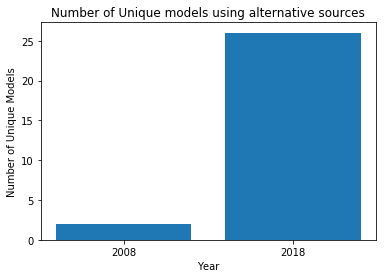

In [12]:
plt.bar(["2008","2018"],[fuel_08,fuel_18])
plt.title("Number of Unique models using alternative sources")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")

In [13]:
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [14]:
prop_08 = fuel_08/total_08
prop_18 = fuel_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

Text(0,0.5,'Proportion of Unique Models Using Fuels')

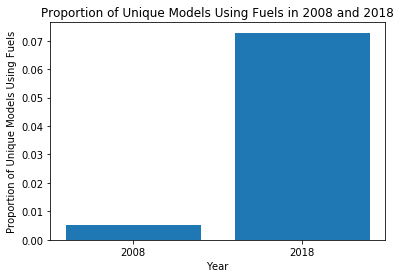

In [15]:
plt.bar(["2008","2018"],[prop_08,prop_18])
plt.title("Proportion of Unique Models Using Fuels in 2008 and 2018")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models Using Fuels")

### Q2: How much have vehicle classes improved in fuel economy?  

In [22]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              24.506173
large car        24.222222
midsize car      24.000000
minivan          20.933333
pickup           23.267606
small car        24.128676
station wagon    24.750000
van              20.619048
Name: cmb_mpg, dtype: float64

In [23]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [18]:
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car         -0.813131
midsize car        3.884058
minivan           -0.133333
pickup            -4.677862
small SUV               NaN
small car          1.292376
special purpose         NaN
standard SUV            NaN
station wagon      2.779412
van                     NaN
Name: cmb_mpg, dtype: float64

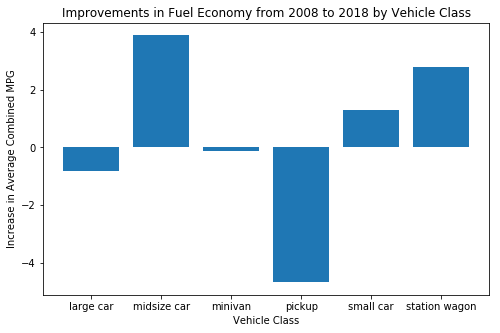

In [19]:
inc.dropna(inplace = True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [24]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [25]:
smart_08 = df_08.query('smartway == "yes"')

In [26]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,289.000000,289.000000,289.000000,380.000000
mean,2.602895,4.826316,7.365789,21.484429,29.076125,24.259516,6.868421
std,0.623436,1.002025,1.148195,8.423302,8.183301,8.259577,0.827338
min,1.300000,4.000000,6.000000,10.000000,15.000000,12.000000,6.000000
25%,2.275000,4.000000,7.000000,17.000000,24.000000,20.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,24.000000,33.000000,27.000000,7.000000
max,5.000000,8.000000,9.500000,102.000000,91.000000,97.000000,10.000000


In [27]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [28]:
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [29]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

In [30]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()


,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,3.645427,6.189024,6.669207,27.472561,35.304878,30.411585,5.027439
std,1.282335,1.970951,0.963174,11.033692,9.024857,10.081539,2.011247
min,1.300000,2.000000,6.000000,21.000000,27.000000,25.000000,0.000000
25%,2.500000,4.000000,6.000000,23.000000,31.000000,26.000000,4.000000
50%,3.500000,6.000000,6.000000,25.000000,33.000000,28.000000,5.000000
75%,4.300000,8.000000,7.000000,28.000000,36.000000,31.000000,6.000000
max,8.000000,16.000000,9.500000,113.000000,99.000000,106.000000,9.000000


In [31]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
